Support Vector Machine支持向量機
====
## 有監督的學習模型
1. 需事先打上『分類標籤』，知道該數據屬於哪個分類。
2. 無監督學習，則是沒有事先分類，不具備先驗的知識。或者打标签的成本很高。所以我们需要机器代我们部分完成这个工作，比如将数据进行『聚类』，方便后续人工对每个类进行分析。
3. SVM 作为有监督的学习模型，通常可以帮我们**『模式识别、分类以及回归分析』**。听起来，是不是很高大上。我先带你做个小练习。

## 练习 1：桌子上我放了红色和蓝色两种球，请你用一根棍子将这两种颜色的球分开。
<img src="./images/22-01.jpg">

## 练习 2：这次难度升级，桌子上依然放着红色、蓝色两种球，但是它们的摆放不规律，如下图所示。如何用一根棍子把这两种颜色分开呢？
<img src="./images/22-02.jpg">
你可能想了想，认为一根棍子是分不开的。除非把棍子弯曲，像下面这样
<img src="./images/22-03.jpg">
所以这里直线变成了曲线。如果在同一个平面上来看，红蓝两种颜色的球是很难分开的。那么有没有一种方式，可以让它们自然地分开呢？这里你可能会灵机一动，猛拍一下桌子，这些小球瞬间腾空而起，如下图所示。在腾起的那一刹那，出现了一个水平切面，恰好把红、蓝两种颜色的球分开。
<img src="./images/22-04.png">
<img src="./images/22-05.jpg">

在这里，二维平面变成了三维空间。原来的曲线变成了一个平面。这个平面，我们就叫做超平面。

SVM 的工作原理
====
用 SVM 计算的过程就是帮我们找到那个超平面的过程，这个超平面就是我们的 SVM 分类器。
1. 练习 1，其实我们可以有多种直线的划分，比如下图所示的直线 A、直线 B 和直线 C，究竟哪种才是更好的划分呢？

<img src="./images/22-06.jpg">

   * 很明显图中的直线 B 更靠近蓝色球，但是在真实环境下，球再多一些的话，蓝色球可能就被划分到了直线 B 的右侧，被认为是红色球。同样直线 A 更靠近红色球，在真实环境下，如果红色球再多一些，也可能会被误认为是蓝色球。所以相比于直线 A 和直线 B，直线 C 的划分更优，因为它的鲁棒性更强。
   
   * 那怎样才能寻找到直线 C 这个更优的答案呢？这里，我们引入一个 SVM 特有的概念：**分类间隔**。
   
   * 实际上，我们的分类环境不是在二维平面中的，而是在多维空间中，这样直线 C 就变成了**决策面 C**。
   
   * 在保证决策面不变，且分类不产生错误的情况下，我们可以移动决策面 C，直到产生两个极限的位置：如图中的决策面 A 和决策面 B。极限的位置是指，如果越过了这个位置，就会产生分类错误。
   
   * 这样的话，两个极限位置 A 和 B 之间的分界线 C 就是最优决策面。极限位置到最优决策面 C 之间的距离，就是“分类间隔”，英文叫做 margin。如果我们转动这个最优决策面，你会发现可能存在多个最优决策面，它们都能把数据集正确分开，这些最优决策面的分类间隔可能是不同的，而那个拥有**最大间隔（max margin）的决策面就是 SVM 要找的最优解**。
   
<img src="./images/22-07.jpg">

點到超平面的距離公式
====
在上面这个例子中，如果我们把红蓝两种颜色的球放到一个三维空间里，你发现**决策面就变成了一个平面**。这里我们可以用线性函数来表示，如果在一维空间里就表示一个点，在二维空间里表示一条直线，在三维空间中代表一个平面，当然空间维数还可以更多，这样我们给这个线性函数起个名称叫做“超平面”。超平面的数学表达可以写成：
<img src="./images/22-08.png">

在这个公式里，w、x 是 n 维空间里的向量，其中 x 是函数变量；w 是法向量。**法向量这里指的是垂直于平面的直线所表示的向量**，它决定了超平面的方向。

SVM 就是帮我们找到一个超平面，这个超平面能将不同的样本划分开，同时使得样本集中的点到这个分类超平面的**最小距离（即分类间隔）最大化**。SVM 就是求解**最大分类间隔**的过程，我们还需要对分类间隔的大小进行定义。

首先，我们定义某类样本集到超平面的距离是这个样本集合内的**样本到超平面的最短距离**。我们用 di 代表点 xi 到超平面 wxi+b=0 的欧氏距离。因此我们要求 di 的最小值，用它来代表这个样本到超平面的最短距离。di 可以用公式计算得出，其中**||w||为超平面的范数**，di 的公式可以用解析几何知识进行推导，这里不做解释。

<img src="./images/22-09.png">

### 最大间隔的优化模型
我们的目标就是找出所有分类间隔中最大的那个值对应的超平面。在数学上，这是一个**凸优化问题**（凸优化就是关于求凸集中的凸函数最小化的问题，这里不具体展开）。通过凸优化问题，最后可以求出最优的 w 和 b，也就是我们想要找的最优超平面。中间求解的过程会用到**拉格朗日乘子，和 KKT（Karush-Kuhn-Tucker）条件**。数学公式比较多，这里不进行展开。

硬间隔、软间隔和非线性 SVM
====
假如数据是完全的线性可分的，那么学习到的模型可以称为**硬间隔支持向量机**。
1. 硬间隔指的就是完全分类准确，不能存在分类错误的情况。
2. 软间隔，就是允许一定量的样本分类错误。

我们知道，实际工作中的数据没有那么“干净”，或多或少都会存在一些噪点。所以线性可分是个理想情况。这时，我们需要使用到**软间隔 SVM（近似线性可分）**，比如下面这种情况：
<img src="./images/22-10.jpg">

另外还存在一种情况，就是**非线性支持向量机**。比如下面的样本集就是个非线性的数据。图中的两类数据，分别分布为两个圆圈的形状。那么这种情况下，不论是多高级的分类器，只要**映射函数是线性的，就没法处理，SVM 也处理不了**。这时，我们需要引入一个新的概念：**核函数**。它可以将样本从原始空间映射到一个**更高维的特质空间**中，使得样本在新的空间中线性可分。这样我们就可以使用原来的推导来进行计算，只是所有的推导是在新的空间，而不是在原来的空间中进行。
<img src="./images/22-11.jpg">

所以在**非线性 SVM** 中，**核函数**的选择就是影响 SVM 最大的变量。最常用的核函数有**线性核、多项式核、高斯核、拉普拉斯核、sigmoid 核**，或者是这些核函数的组合。这些函数的区别在于**映射方式的不同**。通过这些核函数，我们就可以把样本空间投射到新的高维空间中。

当然**软间隔和核函数**的提出，都是为了方便我们对上面超平面公式中的 w* 和 b* 进行求解，从而得到最大分类间隔的超平面。

用 SVM 如何解决多分类问题
====
SVM 本身是一个二值分类器，最初是为**二分类**问题设计的，也就是回答 Yes 或者是 No。而实际上我们要解决的问题，可能是多分类的情况，比如对文本进行分类，或者对图像进行识别。

针对这种情况，我们可以将多个二分类器组合起来形成一个多分类器，常见的方法有“一对多法”和“一对一法”两种。
1. 一對多法：
假设我们要把物体分成 A、B、C、D 四种分类，那么我们可以先把其中的**一类作为分类 1，其他类统一归为分类 2**。这样我们可以构造 4 种 SVM，分别为以下的情况：
   * 样本 A 作为正集，B，C，D 作为负集；
   * 样本 B 作为正集，A，C，D 作为负集；
   * 样本 C 作为正集，A，B，D 作为负集；
   * 样本 D 作为正集，A，B，C 作为负集。

    这种方法，针对 K 个分类，需要训练 K 个分类器，分类速度较快，但**训练速度较慢**，因为每个分类器都需要对全部样本进行训练，而且负样本数量远大于正样本数量，会造成**样本不对称**的情况，而且当增加新的分类，比如第 K+1 类时，需要重新对分类器进行构造。


2. 一對一法：
一对一法的初衷是想在训练的时候更加灵活。我们可以在任意两类样本之间构造一个 SVM，这样针对 K 类的样本，就会有 C(k,2) 类分类器。比如我们想要划分 A、B、C 三个类，可以构造 3 个分类器：
   * 分类器 1：A、B；
   * 分类器 2：A、C；
   * 分类器 3：B、C。
   
    当对一个未知样本进行分类时，每一个分类器都会有一个分类结果，即为 1 票，最终得票最多的类别就是整个未知样本的类别。这样做的好处是，**如果新增一类，不需要重新训练所有的 SVM**，只需要训练和**新增这一类样本的分类器**。而且这种方式在训练单个 SVM 模型的时候，训练速度快。但这种方法的不足在于，分类器的个数与 K 的平方成正比，所以当 K 较大时，训练和测试的时间会比较慢。
    
总结
====
今天我给你讲了 SVM 分类器，它在文本分类尤其是针对二分类任务性能卓越。同样，针对多分类的情况，我们可以采用**一对多，或者一对一的方法，多个二值分类器组合成一个多分类器**。另外关于 SVM 分类器的概念，我希望你能掌握以下的三个程度：
1. 完全线性可分情况下的线性分类器，也就是线性可分的情况，是最原始的 SVM，它最核心的思想就是找到最大的分类间隔；
2. 大部分线性可分情况下的线性分类器，引入了软间隔的概念。软间隔，就是允许一定量的样本分类错误；
3. 线性不可分情况下的非线性分类器，引入了**核函数**。它让原有的样本空间通过核函数投射到了一个高维的空间中，从而变得线性可分。

在 SVM 的推导过程中，有大量的数学公式，这里不进行推导演绎，因为除了写论文，你大部分时候不会用到这些公式推导。

所以最重要的还是理解我上面讲的这些概念，能在实际工作中使用 SVM 才是最重要的。下一节我会和你讲如何用 sklearn 工具包进行 SVM 分类，带你做一个实际的案例。

思考題
====
1. 说一下你对有监督学习和无监督学习的理解吗？
2. SVM 最主要的思想就是硬间隔、软间隔和核函数。你是如何理解它们的？

23如何进行乳腺癌检测？
====
SVM 是有**监督**的学习模型，我们需要事先对数据打上**分类标签**，通过求解最大分类间隔来求解二分类问题。如果要求解多分类问题，可以将多个二分类器组合起来形成一个多分类器。

如何在sklearn中使用SVM
====
```python
from sklearn import svm
```
### SVM可作『回歸』，也可作『分類器』
1. 回歸：使用SVR或LinearSVR(Support Vector Regression)。
从名字上你能看出 LinearSVC 是个线性分类器，用于处理线性可分的数据，只能使用线性核函数。上一节，我讲到 SVM 是通过**核函数**将样本从原始空间映射到一个更**高维的特质空间**中，这样就使得样本在新的空间中线性可分。

2. 分類器：SVC或LinearSVC(Support Vector Classification)。
如果是针对**非线性的数据**，需要用到 SVC。在 SVC 中，我们既可以使用到线性核函数（进行线性划分），也能使用高维的核函数（进行非线性划分）。


### 如何創建SVM分類器？
我们首先使用 SVC 的构造函数：**model = svm.SVC(kernel=‘rbf’, C=1.0, gamma=‘auto’)**，这里有三个重要的参数 kernel、C 和 gamma。

#### kernel：代表**核函数**的选择，它有四种选择，只不过默认是 rbf，即『高斯核函数』。四种函数代表**不同的映射方式**，你可能会问，在实际工作中，如何选择这 4 种核函数呢？

1. linear：线性核函数：是在数据线性可分的情况下使用的，运算速度快，效果好。不足在于它不能处理线性不可分的数据。
2. poly：多项式核函数：可以将数据从低维空间映射到高维空间，但参数比较多，计算量大。
3. rbf：高斯核函数（默认）：同样可以将样本映射到高维空间，但相比于多项式核函数来说所需的参数比较少，通常性能不错，所以是默认使用的核函数。
4. sigmoid：sigmoid 核函数：经常用在神经网络的映射中。因此当选用 sigmoid 核函数时，SVM 实现的是多层神经网络。

上面介绍的 4 种核函数，除了第一种线性核函数外，其余 3 种都可以处理线性不可分的数据。

#### 参数 C ：代表目标函数的『惩罚系数』，惩罚系数指的是『分错样本』时的惩罚程度，默认情况下为 1.0。当 C 越大的时候，分类器的准确性越高，但同样容错率会越低，泛化能力会变差。相反，C 越小，泛化能力越强，但是准确性会降低。

#### 参数 gamma： 代表核函数的系数，默认为样本特征数的倒数，即 gamma = 1 / n_features。

### 在创建 SVM 分类器之后，就可以输入训练集对它进行训练。
1. 我们使用 **model.fit(train_X,train_y)**，传入训练集中的『特征值矩阵 train_X』 和『分类标识 train_y』。

    『特征值矩阵』就是我们在特征选择后抽取的特征值矩阵（当然你也可以用全部数据作为特征值矩阵）；分类标识就是人工事先针对每个样本标识的分类结果。这样模型会自动进行分类器的训练。

    我们可以使用 prediction=model.predict(test_X) 来对结果进行预测，传入测试集中的样本特征矩阵 test_X，可以得到测试集的预测分类结果 prediction。


2. 同样我们也可以创建线性 SVM 分类器，使用 **model=svm.LinearSVC()**。在 LinearSVC 中没有 kernel 这个参数，限制我们只能使用线性核函数。由于 LinearSVC 对线性分类做了优化，对于**数据量大**的线性可分问题，使用 LinearSVC 的效率要高于 SVC。

3. 如果你不知道数据集是否为线性，可以直接使用 SVC 类创建 SVM 分类器。

    在训练和预测中，LinearSVC 和 SVC 一样，都是使用 model.fit(train_X,train_y) 和 model.predict(test_X)。

## 如何用SVM進行乳腺癌檢測
医疗人员采集了患者乳腺肿块经过细针穿刺 (FNA) 后的数字化图像，并且对这些数字图像进行了特征提取，这些特征可以描述图像中的细胞核呈现。肿瘤可以分成良性和恶性。部分数据截屏如下所示：
<img src="./images/23-01.png">
數據表包括32個字段(欄位)，代表含義如下：
<img src="./images/23-02.jpg">
上面的表格中，mean 代表平均值，se 代表标准差，worst 代表最大值（3 个最大值的平均值）。每张图像都计算了相应的特征，得出了这 30 个特征值（不包括 ID 字段和分类标识结果字段 diagnosis），实际上是 10 个特征值（radius、texture、perimeter、area、smoothness、compactness、concavity、concave points、symmetry 和 fractal_dimension_mean）的 3 个维度，平均、标准差和最大值。这些特征值都保留了 4 位数字。字段中没有缺失的值。在 569 个患者中，一共有 357 个是良性，212 个是恶性。

好了，我们的目标是生成一个乳腺癌诊断的 SVM 分类器，并计算这个分类器的准确率。首先设定项目的执行流程：
<img src="./images/23-03.png">

1. 首先我们需要加载数据源；
2. 在准备阶段，需要对加载的数据源进行探索，查看样本特征和特征值，这个过程你也可以使用**数据可视化**，它可以方便我们对数据及数据之间的关系进一步加深了解。然后按照“完全合一”的准则来评估数据的质量，如果数据质量不高就需要做数据清洗。数据清洗之后，你可以做**特征选择**，方便后续的模型训练；
3. 在分类阶段，选择核函数进行训练，如果不知道数据是否为线性，可以考虑使用 SVC(kernel=‘rbf’) ，也就是**高斯核函数**的 SVM 分类器。然后对训练好的模型用测试集进行评估。

```python
# 加载数据集，你需要把数据放到目录中
data = pd.read_csv("./data.csv")
# 数据探索
# 因为数据集中列比较多，我们需要把dataframe中的列全部显示出来
pd.set_option('display.max_columns', None)
print(data.columns)
print(data.head(5))
print(data.describe())
```
运行结果中，你能看到 32 个字段里，id 是没有实际含义的，可以去掉。diagnosis 字段的取值为 B 或者 M，我们可以用 0 和 1 来替代。另外其余的 30 个字段，其实可以分成三组字段，下划线后面的 mean、se 和 worst 代表了每组字段不同的度量方式，分别是平均值、标准差和最大值。
```python
# 将特征字段分成3组
features_mean= list(data.columns[2:12])
features_se= list(data.columns[12:22])
features_worst=list(data.columns[22:32])
# 数据清洗
# ID列没有用，删除该列
data.drop("id",axis=1,inplace=True)
# 将B良性替换为0，M恶性替换为1
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})
```

然后我们要做特征字段的筛选，首先需要观察下 features_mean 各变量之间的关系，这里我们可以用 DataFrame 的 corr() 函数，然后用**热力图**帮我们可视化呈现。同样，我们也会看整体良性、恶性肿瘤的诊断情况。

```python
# 将肿瘤诊断结果可视化
sns.countplot(data['diagnosis'],label="Count")
plt.show()
# 用热力图呈现features_mean字段之间的相关性
corr = data[features_mean].corr()
plt.figure(figsize=(14,14))
# annot=True显示每个方格的数据
sns.heatmap(corr, annot=True)
plt.show()
```
热力图中对角线上的为单变量自身的相关系数是 1。颜色越浅代表相关性越大。所以你能看出来 radius_mean、perimeter_mean 和 area_mean 相关性非常大，compactness_mean、concavity_mean、concave_points_mean 这三个字段也是相关的，因此我们可以取其中的一个作为代表。

### 那么如何进行特征选择呢？
特征选择的目的是**降维**，用少量的特征代表数据的特性，这样也可以增强分类器的**泛化能力**，避免数据过拟合。

我们能看到 mean、se 和 worst 这三组特征是**对同一组内容的不同度量方式**，我们可以保留 mean 这组特征，在特征选择中忽略掉 se 和 worst。同时我们能看到 mean 这组特征中，**radius_mean、perimeter_mean、area_mean 这三个属性相关性大**，compactness_mean、daconcavity_mean、concave points_mean 这三个属性相关性大。我们分别从这 **2 类中选择 1 个属性作为代表**，比如 radius_mean 和 compactness_mean。

这样我们就可以把原来的 10 个属性缩减为 6 个属性，代码如下：
```python
# 特征选择
features_remain = ['radius_mean','texture_mean', 'smoothness_mean','compactness_mean','symmetry_mean', 'fractal_dimension_mean'] 
```
对特征进行选择之后，我们就可以准备训练集和测试集：
```python
# 抽取30%的数据作为测试集，其余作为训练集
train, test = train_test_split(data, test_size = 0.3)# in this our main data is splitted into train and test
# 抽取特征选择的数值作为训练和测试数据
train_X = train[features_remain]
train_y=train['diagnosis']
test_X= test[features_remain]
test_y =test['diagnosis']
```

在训练之前，我们需要对数据进行规范化，这样让数据同在同一个量级上，避免因为维度问题造成数据误差：
```python
# 采用Z-Score规范化数据，保证每个特征维度的数据均值为0，方差为1
ss = StandardScaler()
train_X = ss.fit_transform(train_X)
test_X = ss.transform(test_X)
```

最后我们可以让 SVM 做训练和预测了：
```python
# 创建SVM分类器
model = svm.SVC()
# 用训练集做训练
model.fit(train_X,train_y)
# 用测试集做预测
prediction=model.predict(test_X)
print('准确率: ', metrics.accuracy_score(test_y,prediction))
```
運行結果：
```python
准确率:  0.9181286549707602
```

總結
====
今天我带你一起做了乳腺癌诊断分类的 SVM 实战，从这个过程中你应该能体会出来整个执行的流程，包括数据加载、数据探索、数据清洗、特征选择、SVM 训练和结果评估等环节。

sklearn 已经为我们提供了很好的工具，对上节课中讲到的 SVM 的创建和训练都进行了封装，让我们无需关心中间的运算细节。但正因为这样，我们更需要对每个流程熟练掌握，通过实战项目训练数据化思维和对数据的敏感度。
<img src="./images/23-04.png">

思考題
====
1. 请你用 LinearSVC，选取全部的特征（除了 ID 以外）作为训练数据，看下你的分类器能得到多少的准确度呢？
2. 另外你对 sklearn 中 SVM 使用又有什么样的体会呢？


In [53]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn import metrics

# 加载数据集
data = pd.read_csv("./breast_cancer_data-master/data.csv")
# 数据探索
# 因为数据集中列比较多，我们需要把dataframe中的『欄位』columns全部显示出来
pd.set_option('display.max_columns', None)
print(data.columns)
print(data.head(5))
print(data.describe())

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42

In [14]:
len(data.columns)
# 32個欄位分成三組，index 0 與1不選，後面30個是mean, se, worst三種單位，特徵選擇時，只要選擇其中一組

32

In [54]:
# 将特征字段分成3组
features_mean= list(data.columns[2:12])
features_se= list(data.columns[12:22])
features_worst=list(data.columns[22:32])
# 数据清洗
# ID列没有用，删除该欄位
data.drop("id",axis=1,inplace=True)
# 将B良性替换为0，M恶性替换为1
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})

/Users/yuyu/PythonProject/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


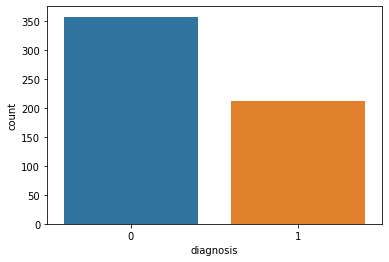

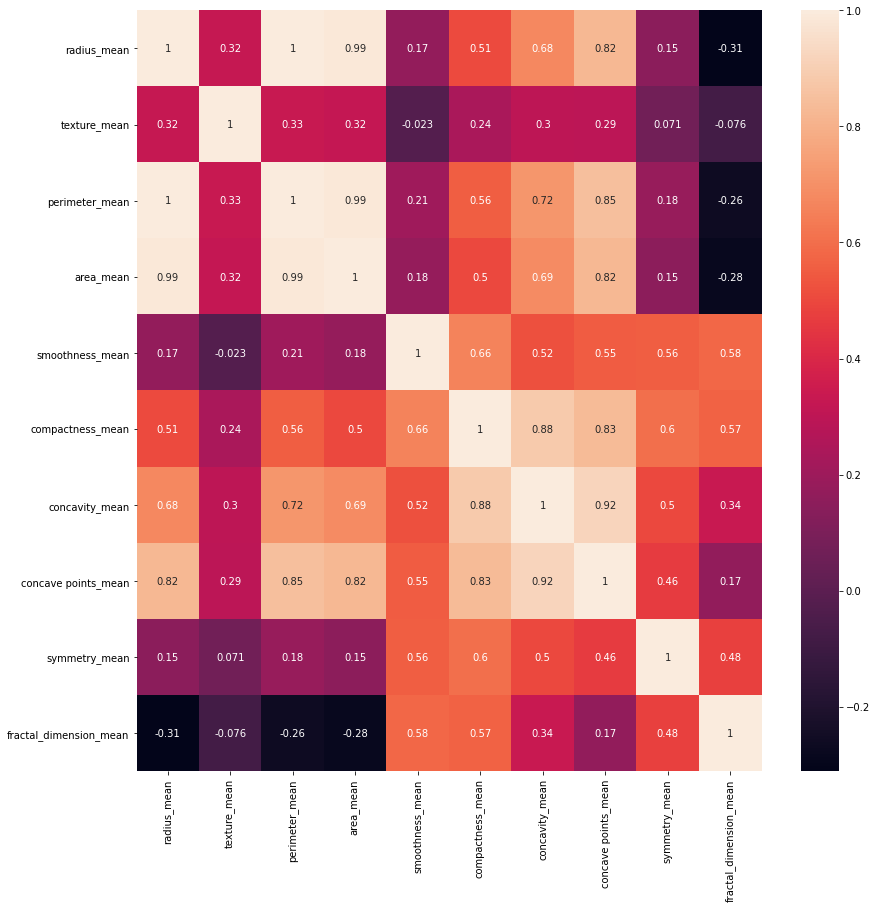

In [55]:
# 将肿瘤诊断结果可视化
sns.countplot(data['diagnosis'],label="Count")
plt.show()
# 用热力图呈现features_mean字段之间的相关性
corr = data[features_mean].corr()
plt.figure(figsize=(14,14))
# annot=True显示每个方格的数据
sns.heatmap(corr, annot=True)
plt.show()
# 同时我们能看到 mean 这组特征中，radius_mean、perimeter_mean、area_mean 这三个属性相关性大，
# compactness_mean、daconcavity_mean、concave points_mean 这三个属性相关性大。
# 我们分别从这 2 类中选择 1 个属性作为代表，比如 radius_mean 和 compactness_mean。

In [62]:
# 特征选择
features_remain = ['radius_mean','texture_mean', 'smoothness_mean','compactness_mean','symmetry_mean', 'fractal_dimension_mean'] 


# 抽取30%的数据作为测试集，其余作为训练集
train, test = train_test_split(data, test_size = 0.3)# in this our main data is splitted into train and test
# 抽取特征选择的数值作为训练和测试数据
train_X = train[features_remain]
train_y=train['diagnosis']
test_X= test[features_remain]
test_y =test['diagnosis']


# 采用Z-Score规范化数据，保证每个特征维度的数据均值为0，方差为1
ss = StandardScaler()
train_X = ss.fit_transform(train_X)
test_X = ss.transform(test_X)


# 创建SVM分类器
model = svm.SVC()
# 用训练集做训练
model.fit(train_X,train_y)
# 用测试集做预测
prediction=model.predict(test_X)
print('准确率: ', metrics.accuracy_score(test_y,prediction))

准确率:  0.9239766081871345


In [44]:
model_linear = svm.LinearSVC()
model_linear.fit(train_X, train_y)
prediction_linear = model_linear.predict(test_X)
print('准确率: ', metrics.accuracy_score(test_y,prediction_linear))

准确率:  0.9532163742690059


In [63]:
# 特征选择
features_remain = list(data.columns)[1:]

# 抽取30%的数据作为测试集，其余作为训练集
train, test = train_test_split(data, test_size = 0.3)# in this our main data is splitted into train and test
# 抽取特征选择的数值作为训练和测试数据
train_X = train[features_remain]
train_y=train['diagnosis']
test_X= test[features_remain]
test_y =test['diagnosis']


# 采用Z-Score规范化数据，保证每个特征维度的数据均值为0，方差为1
ss = StandardScaler()
train_X = ss.fit_transform(train_X)
test_X = ss.transform(test_X)


# 创建SVM分类器
model = svm.LinearSVC()
# 用训练集做训练
model.fit(train_X,train_y)
# 用测试集做预测
prediction=model.predict(test_X)
print('准确率: ', metrics.accuracy_score(test_y,prediction))

准确率:  0.9707602339181286


/Users/yuyu/PythonProject/venv/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [57]:
list(data.columns)[1:]

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']